In [1]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from fastai.imports import *
from sklearn.model_selection import GridSearchCV, ParameterGrid, train_test_split, StratifiedKFold

/Users/princegrover/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/princegrover/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/princegrover/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/princegrover/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
train_raw = pd.read_csv('intermediate_data/raw_train.csv')
test_raw = pd.read_csv('intermediate_data/raw_test.csv')
x_trn3 = train_raw.drop(['stroke', 'age_bins'], axis=1)
y_trn3 = train_raw['stroke'].values

In [10]:
train_raw.shape, test_raw.shape

((43400, 13), (18601, 12))

In [3]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [6]:
x_trn3[:1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,-1


In [7]:
cols_onehot = ['gender', 'hypertension', 'heart_disease',
               'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [8]:
df_concat = pd.concat([train_raw, test_raw])
ohc_concat = pd.get_dummies(df_concat, columns=cols_onehot)


In [9]:
ohc_concat.shape

(62001, 26)

In [11]:
ohc_train = ohc_concat.copy()[:43400]
ohc_test = ohc_concat.copy()[43400:]

In [14]:
ohc_train.shape, ohc_test.shape

((43400, 26), (18601, 26))

Scalar

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(ohc_train.drop(['stroke'],axis=1)), 
                       columns = ohc_train.drop(['stroke'],axis=1).columns)
y_train = ohc_train.stroke

x_test = pd.DataFrame(scaler.transform(ohc_test.drop(['stroke'],axis=1)), 
                      columns = ohc_test.drop(['stroke'],axis=1).columns)

In [23]:
x_train.shape, y_train.shape, x_test.shape

((43400, 25), (43400,), (18601, 25))

### Tuning

In [30]:
x_train.drop('age_bins',axis=1, inplace=True)
x_test.drop('age_bins',axis=1, inplace=True)

In [31]:
clf = SGDClassifier() # faster than vanilla logit 

grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'n_iter': [10, 100, 250, 500], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2', 'l1', 'None'],
    'n_jobs': [-1]
}

grid_obj = GridSearchCV(clf, grid, 
                        scoring='roc_auc',
                        verbose=20,
                        cv = StratifiedKFold(n_splits=5, 
                                   shuffle=True,
                                   random_state=1).split(x_train,y_train))

grid_obj = grid_obj.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l2 ........
[CV]  alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l2, score=0.8548444706142567, total=   0.6s
[CV] alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l2 ........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l2, score=0.8145946850705539, total=   0.2s
[CV] alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l2 ........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l2, score=0.8141977758197938, total=   0.2s
[CV] alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l2 ........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s


[CV]  alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l2, score=0.8325218037467246, total=   0.2s
[CV] alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l2 ........


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s


[CV]  alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l2, score=0.8441231419056129, total=   0.2s
[CV] alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l1 ........


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s remaining:    0.0s


[CV]  alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l1, score=0.8273679113600564, total=   0.3s
[CV] alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l1 ........


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.8s remaining:    0.0s


[CV]  alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l1, score=0.8342626439547235, total=   0.3s
[CV] alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l1 ........


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s remaining:    0.0s


[CV]  alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l1, score=0.8428643064738276, total=   0.3s
[CV] alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l1 ........


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.4s remaining:    0.0s


[CV]  alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l1, score=0.8488915363255385, total=   0.3s
[CV] alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l1 ........


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.7s remaining:    0.0s


[CV]  alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=l1, score=0.8585381336173311, total=   0.3s
[CV] alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=None ......


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.0s remaining:    0.0s


[CV]  alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=None, score=0.8040093613536302, total=   0.2s
[CV] alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=None ......


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    3.3s remaining:    0.0s


[CV]  alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=None, score=0.802573923907618, total=   0.2s
[CV] alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=None ......


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    3.5s remaining:    0.0s


[CV]  alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=None, score=0.8405625542275641, total=   0.2s
[CV] alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=None ......


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    3.7s remaining:    0.0s


[CV]  alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=None, score=0.8418683080773894, total=   0.2s
[CV] alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=None ......


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    4.0s remaining:    0.0s


[CV]  alpha=0.0001, loss=log, n_iter=10, n_jobs=-1, penalty=None, score=0.8218861782747738, total=   0.2s
[CV] alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l2 .......


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    4.2s remaining:    0.0s


[CV]  alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l2, score=0.8430478797968718, total=   1.7s
[CV] alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l2 .......


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    6.0s remaining:    0.0s


[CV]  alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l2, score=0.8356779060696362, total=   1.7s
[CV] alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l2 .......


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    7.7s remaining:    0.0s


[CV]  alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l2, score=0.8434509543677616, total=   1.3s
[CV] alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l2 .......


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    9.1s remaining:    0.0s


[CV]  alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l2, score=0.8577875251581693, total=   1.5s
[CV] alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l2 .......


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   10.6s remaining:    0.0s


[CV]  alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l2, score=0.8604312012442952, total=   1.6s
[CV] alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l1 .......
[CV]  alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l1, score=0.8486200073527872, total=   2.4s
[CV] alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l1 .......
[CV]  alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l1, score=0.8364639967480356, total=   2.3s
[CV] alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l1 .......
[CV]  alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l1, score=0.8439987415094861, total=   2.1s
[CV] alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l1 .......
[CV]  alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l1, score=0.8593511674293091, total=   2.1s
[CV] alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l1 .......
[CV]  alpha=0.0001, loss=log, n_iter=100, n_jobs=-1, penalty=l1, score=0.8612156547742608, total=   2.3s
[CV] alpha=0.00

[CV]  alpha=0.001, loss=log, n_iter=10, n_jobs=-1, penalty=l1, score=0.7868326822430186, total=   0.3s
[CV] alpha=0.001, loss=log, n_iter=10, n_jobs=-1, penalty=l1 .........
[CV]  alpha=0.001, loss=log, n_iter=10, n_jobs=-1, penalty=l1, score=0.838251834115406, total=   0.2s
[CV] alpha=0.001, loss=log, n_iter=10, n_jobs=-1, penalty=l1 .........
[CV]  alpha=0.001, loss=log, n_iter=10, n_jobs=-1, penalty=l1, score=0.8484026630805934, total=   0.2s
[CV] alpha=0.001, loss=log, n_iter=10, n_jobs=-1, penalty=l1 .........
[CV]  alpha=0.001, loss=log, n_iter=10, n_jobs=-1, penalty=l1, score=0.8453159926232787, total=   0.2s
[CV] alpha=0.001, loss=log, n_iter=10, n_jobs=-1, penalty=None .......
[CV]  alpha=0.001, loss=log, n_iter=10, n_jobs=-1, penalty=None, score=0.8352616964613964, total=   0.2s
[CV] alpha=0.001, loss=log, n_iter=10, n_jobs=-1, penalty=None .......
[CV]  alpha=0.001, loss=log, n_iter=10, n_jobs=-1, penalty=None, score=0.8159165428748203, total=   0.2s
[CV] alpha=0.001, loss=l

[CV]  alpha=0.001, loss=log, n_iter=500, n_jobs=-1, penalty=l1, score=0.8569692265573997, total=  10.7s
[CV] alpha=0.001, loss=log, n_iter=500, n_jobs=-1, penalty=l1 ........
[CV]  alpha=0.001, loss=log, n_iter=500, n_jobs=-1, penalty=l1, score=0.8571151364181987, total=  11.2s
[CV] alpha=0.001, loss=log, n_iter=500, n_jobs=-1, penalty=None ......
[CV]  alpha=0.001, loss=log, n_iter=500, n_jobs=-1, penalty=None, score=0.851284645526905, total=   7.7s
[CV] alpha=0.001, loss=log, n_iter=500, n_jobs=-1, penalty=None ......
[CV]  alpha=0.001, loss=log, n_iter=500, n_jobs=-1, penalty=None, score=0.8333831489656781, total=   7.9s
[CV] alpha=0.001, loss=log, n_iter=500, n_jobs=-1, penalty=None ......
[CV]  alpha=0.001, loss=log, n_iter=500, n_jobs=-1, penalty=None, score=0.8442834712516375, total=   8.5s
[CV] alpha=0.001, loss=log, n_iter=500, n_jobs=-1, penalty=None ......
[CV]  alpha=0.001, loss=log, n_iter=500, n_jobs=-1, penalty=None, score=0.8591405758776404, total=   7.5s
[CV] alpha=0.0

[CV]  alpha=0.01, loss=log, n_iter=250, n_jobs=-1, penalty=None, score=0.7959549208379787, total=   4.3s
[CV] alpha=0.01, loss=log, n_iter=250, n_jobs=-1, penalty=None .......
[CV]  alpha=0.01, loss=log, n_iter=250, n_jobs=-1, penalty=None, score=0.8114204329775501, total=   4.2s
[CV] alpha=0.01, loss=log, n_iter=250, n_jobs=-1, penalty=None .......
[CV]  alpha=0.01, loss=log, n_iter=250, n_jobs=-1, penalty=None, score=0.8056670933876187, total=   3.9s
[CV] alpha=0.01, loss=log, n_iter=250, n_jobs=-1, penalty=None .......
[CV]  alpha=0.01, loss=log, n_iter=250, n_jobs=-1, penalty=None, score=0.7801221130154604, total=   4.2s
[CV] alpha=0.01, loss=log, n_iter=250, n_jobs=-1, penalty=None .......
[CV]  alpha=0.01, loss=log, n_iter=250, n_jobs=-1, penalty=None, score=0.8468563194011979, total=   4.0s
[CV] alpha=0.01, loss=log, n_iter=500, n_jobs=-1, penalty=l2 .........
[CV]  alpha=0.01, loss=log, n_iter=500, n_jobs=-1, penalty=l2, score=0.8432526220458084, total=   8.5s
[CV] alpha=0.01, 

[CV]  alpha=0.1, loss=log, n_iter=100, n_jobs=-1, penalty=None, score=0.8036421808861091, total=   1.7s
[CV] alpha=0.1, loss=log, n_iter=100, n_jobs=-1, penalty=None ........
[CV]  alpha=0.1, loss=log, n_iter=100, n_jobs=-1, penalty=None, score=0.7784253467991588, total=   1.7s
[CV] alpha=0.1, loss=log, n_iter=250, n_jobs=-1, penalty=l2 ..........
[CV]  alpha=0.1, loss=log, n_iter=250, n_jobs=-1, penalty=l2, score=0.818585664455849, total=   4.3s
[CV] alpha=0.1, loss=log, n_iter=250, n_jobs=-1, penalty=l2 ..........
[CV]  alpha=0.1, loss=log, n_iter=250, n_jobs=-1, penalty=l2, score=0.7955282499469464, total=   3.8s
[CV] alpha=0.1, loss=log, n_iter=250, n_jobs=-1, penalty=l2 ..........
[CV]  alpha=0.1, loss=log, n_iter=250, n_jobs=-1, penalty=l2, score=0.8161617384506965, total=   4.3s
[CV] alpha=0.1, loss=log, n_iter=250, n_jobs=-1, penalty=l2 ..........
[CV]  alpha=0.1, loss=log, n_iter=250, n_jobs=-1, penalty=l2, score=0.8284889755322702, total=   4.7s
[CV] alpha=0.1, loss=log, n_it

[CV]  alpha=1.0, loss=log, n_iter=100, n_jobs=-1, penalty=l2, score=0.8133144410291822, total=   1.1s
[CV] alpha=1.0, loss=log, n_iter=100, n_jobs=-1, penalty=l2 ..........
[CV]  alpha=1.0, loss=log, n_iter=100, n_jobs=-1, penalty=l2, score=0.8248735698577304, total=   1.1s
[CV] alpha=1.0, loss=log, n_iter=100, n_jobs=-1, penalty=l2 ..........
[CV]  alpha=1.0, loss=log, n_iter=100, n_jobs=-1, penalty=l2, score=0.8299638685066351, total=   1.1s
[CV] alpha=1.0, loss=log, n_iter=100, n_jobs=-1, penalty=l1 ..........
[CV]  alpha=1.0, loss=log, n_iter=100, n_jobs=-1, penalty=l1, score=0.5, total=   1.6s
[CV] alpha=1.0, loss=log, n_iter=100, n_jobs=-1, penalty=l1 ..........
[CV]  alpha=1.0, loss=log, n_iter=100, n_jobs=-1, penalty=l1, score=0.5, total=   1.5s
[CV] alpha=1.0, loss=log, n_iter=100, n_jobs=-1, penalty=l1 ..........
[CV]  alpha=1.0, loss=log, n_iter=100, n_jobs=-1, penalty=l1, score=0.5, total=   1.6s
[CV] alpha=1.0, loss=log, n_iter=100, n_jobs=-1, penalty=l1 ..........
[CV]  a

[CV]  alpha=10.0, loss=log, n_iter=10, n_jobs=-1, penalty=l1, score=0.5, total=   0.3s
[CV] alpha=10.0, loss=log, n_iter=10, n_jobs=-1, penalty=l1 ..........
[CV]  alpha=10.0, loss=log, n_iter=10, n_jobs=-1, penalty=l1, score=0.5, total=   0.9s
[CV] alpha=10.0, loss=log, n_iter=10, n_jobs=-1, penalty=l1 ..........
[CV]  alpha=10.0, loss=log, n_iter=10, n_jobs=-1, penalty=l1, score=0.5, total=   0.3s
[CV] alpha=10.0, loss=log, n_iter=10, n_jobs=-1, penalty=l1 ..........
[CV]  alpha=10.0, loss=log, n_iter=10, n_jobs=-1, penalty=l1, score=0.5, total=   0.3s
[CV] alpha=10.0, loss=log, n_iter=10, n_jobs=-1, penalty=None ........
[CV]  alpha=10.0, loss=log, n_iter=10, n_jobs=-1, penalty=None, score=0.4266312876045754, total=   0.2s
[CV] alpha=10.0, loss=log, n_iter=10, n_jobs=-1, penalty=None ........
[CV]  alpha=10.0, loss=log, n_iter=10, n_jobs=-1, penalty=None, score=0.6360422576046054, total=   0.2s
[CV] alpha=10.0, loss=log, n_iter=10, n_jobs=-1, penalty=None ........
[CV]  alpha=10.0, 

[CV]  alpha=10.0, loss=log, n_iter=500, n_jobs=-1, penalty=None, score=0.522769729232112, total=   5.0s
[CV] alpha=10.0, loss=log, n_iter=500, n_jobs=-1, penalty=None .......
[CV]  alpha=10.0, loss=log, n_iter=500, n_jobs=-1, penalty=None, score=0.5280930277044658, total=   4.9s
[CV] alpha=10.0, loss=log, n_iter=500, n_jobs=-1, penalty=None .......
[CV]  alpha=10.0, loss=log, n_iter=500, n_jobs=-1, penalty=None, score=0.4863550183803884, total=   4.9s
[CV] alpha=10.0, loss=log, n_iter=500, n_jobs=-1, penalty=None .......
[CV]  alpha=10.0, loss=log, n_iter=500, n_jobs=-1, penalty=None, score=0.6717351540477201, total=   4.9s
[CV] alpha=10.0, loss=log, n_iter=500, n_jobs=-1, penalty=None .......
[CV]  alpha=10.0, loss=log, n_iter=500, n_jobs=-1, penalty=None, score=0.6377885480314203, total=   4.9s
[CV] alpha=100.0, loss=log, n_iter=10, n_jobs=-1, penalty=l2 .........
[CV]  alpha=100.0, loss=log, n_iter=10, n_jobs=-1, penalty=l2, score=0.8112769639563974, total=   0.1s
[CV] alpha=100.0, 

[CV]  alpha=100.0, loss=log, n_iter=250, n_jobs=-1, penalty=None, score=0.5218172847528708, total=   2.5s
[CV] alpha=100.0, loss=log, n_iter=500, n_jobs=-1, penalty=l2 ........
[CV]  alpha=100.0, loss=log, n_iter=500, n_jobs=-1, penalty=l2, score=0.8113315120738148, total=   5.3s
[CV] alpha=100.0, loss=log, n_iter=500, n_jobs=-1, penalty=l2 ........
[CV]  alpha=100.0, loss=log, n_iter=500, n_jobs=-1, penalty=l2, score=0.7907593994625889, total=   5.2s
[CV] alpha=100.0, loss=log, n_iter=500, n_jobs=-1, penalty=l2 ........
[CV]  alpha=100.0, loss=log, n_iter=500, n_jobs=-1, penalty=l2, score=0.8103460774180915, total=   5.1s
[CV] alpha=100.0, loss=log, n_iter=500, n_jobs=-1, penalty=l2 ........
[CV]  alpha=100.0, loss=log, n_iter=500, n_jobs=-1, penalty=l2, score=0.8195666627556807, total=   5.5s
[CV] alpha=100.0, loss=log, n_iter=500, n_jobs=-1, penalty=l2 ........
[CV]  alpha=100.0, loss=log, n_iter=500, n_jobs=-1, penalty=l2, score=0.8240748261867588, total=   5.0s
[CV] alpha=100.0, l

[CV]  alpha=1000.0, loss=log, n_iter=250, n_jobs=-1, penalty=l2, score=0.8101345852474122, total=   4.1s
[CV] alpha=1000.0, loss=log, n_iter=250, n_jobs=-1, penalty=l2 .......
[CV]  alpha=1000.0, loss=log, n_iter=250, n_jobs=-1, penalty=l2, score=0.8192748430340827, total=   3.9s
[CV] alpha=1000.0, loss=log, n_iter=250, n_jobs=-1, penalty=l2 .......
[CV]  alpha=1000.0, loss=log, n_iter=250, n_jobs=-1, penalty=l2, score=0.8236566515341595, total=   3.9s
[CV] alpha=1000.0, loss=log, n_iter=250, n_jobs=-1, penalty=l1 .......
[CV]  alpha=1000.0, loss=log, n_iter=250, n_jobs=-1, penalty=l1, score=0.5, total=   4.4s
[CV] alpha=1000.0, loss=log, n_iter=250, n_jobs=-1, penalty=l1 .......
[CV]  alpha=1000.0, loss=log, n_iter=250, n_jobs=-1, penalty=l1, score=0.5, total=   3.7s
[CV] alpha=1000.0, loss=log, n_iter=250, n_jobs=-1, penalty=l1 .......
[CV]  alpha=1000.0, loss=log, n_iter=250, n_jobs=-1, penalty=l1, score=0.5, total=   3.7s
[CV] alpha=1000.0, loss=log, n_iter=250, n_jobs=-1, penalty=

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 27.3min finished


In [34]:
 grid_obj.best_params_, grid_obj.best_score_

({'alpha': 0.0001,
  'loss': 'log',
  'n_iter': 250,
  'n_jobs': -1,
  'penalty': 'None'},
 0.8507741865512534)

In [40]:
preds=grid_obj.best_estimator_.predict_proba(x_test)[:,1]

/Users/princegrover/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


(array([14669.,  1888.,  1127.,   530.,   225.,    84.,    48.,    18.,    10.,     2.]),
 array([0.     , 0.02503, 0.05007, 0.0751 , 0.10013, 0.12516, 0.1502 , 0.17523, 0.20026, 0.2253 , 0.25033]),
 <a list of 10 Patch objects>)

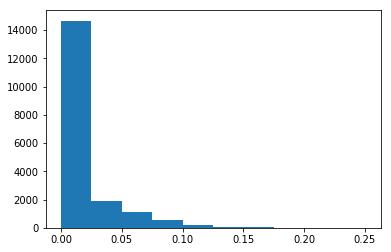

In [42]:
plt.hist(preds)

In [43]:
pred_df = pd.DataFrame(test_raw.id)
pred_df['stroke'] = preds
pred_df.to_csv('submissions/logit_tuned.csv', index=False)